## CMPINF 2100 Week 12
### Introduction to working with more than 1 input
We will learn the basics of working with more than 1 input by focusing on 2 inputs in this notebook.

We will FOCUS on INTERPRETATION in this notebook rather than FITTING models.
## Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

## Introduction
We know how to work with 1 CONTINUOUS input in our LINEAR MODELS for REGRESSION.

Lets begin with ADDITIVE LINEAR relationships!!!

### Additive
#### Linear relationships
We will define a function taht calculates the AVERAGE OUTPUT or TREND given input 1 and input 2 and 3 regression coefficients.

The purpose of this function is to allow visualizing the TREND with respect to input 1.

In [4]:
def calc_trend_wrt_x1(x1, x2, b0, b1, b2):
    res_df = pd.DataFrame({"x1": x1})

    res_df["x2"] = x2

    res_df["trend"] = b0 + b1*res_df.x1 + b2*res_df.x2

    return res_df

To demonstrate the relationships, lets define the following COEFFICIENTS!!!

In [5]:
b0 = -0.25
b1 = 1.95
b2 = 0.2

Lets now define 101 evenly or uniformly spaced values of x1 between -3 and 3.

In [6]:
x1_values = np.linspace(-3, 3, num=101)

In [7]:
x1_values.size

101

Lets calculate the AVERAGE OUTPUT for a SINGLE value of x2 at 0.

In [8]:
calc_trend_wrt_x1(x1_values, 0, b0, b1, b2)

,x1,x2,trend
0,-3.00,0,-6.100
1,-2.94,0,-5.983
2,-2.88,0,-5.866
3,-2.82,0,-5.749
4,-2.76,0,-5.632
...,...,...,...
96,2.76,0,5.132
97,2.82,0,5.249
98,2.88,0,5.366
99,2.94,0,5.483


In [9]:
calc_trend_wrt_x1(x1_values, 0, b0, b1, b2).x2.value_counts()

x2
0    101
Name: count, dtype: int64

Lets visualize the RELATIONSHIP between the AVERAGE OUTPUT and INPUT 1.

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


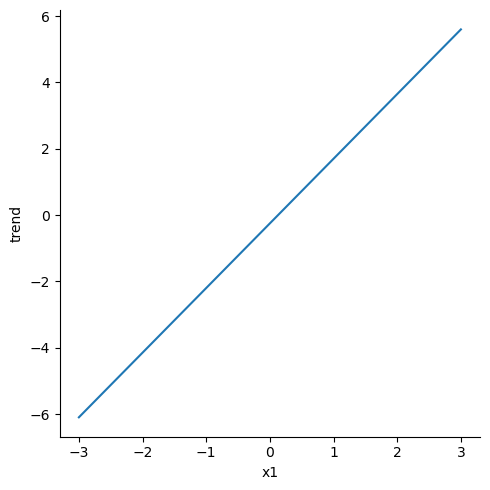

In [10]:
sns.relplot(data=calc_trend_wrt_x1(x1_values, 0, b0, b1, b2),
            x="x1",
            y="trend",
            kind="line")

plt.show()

But now what happens if we CHANGE x2 from 0 to -2???

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


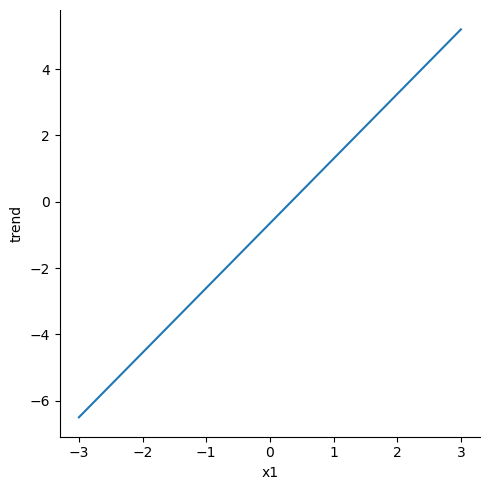

In [11]:
sns.relplot(data=calc_trend_wrt_x1(x1_values, -2, b0, b1, b2),
            x="x1",
            y="trend",
            kind="line")

plt.show()

Lets REPEAT or REPLICATE calculating the TREND with respect to x1 FOR different values of x2!!!

In [12]:
x2_values = np.linspace(-3, 3, num=9)

In [13]:
x2_values

array([-3.  , -2.25, -1.5 , -0.75,  0.  ,  0.75,  1.5 ,  2.25,  3.  ])

We could use a for-loop to ITERATE but lets review LIST COMPREHENSIONS!!!

In [14]:
study_wrt_x1_list = [calc_trend_wrt_x1(x1_values, x2, b0, b1, b2) for x2 in x2_values]

In [22]:
len(study_wrt_x1_list)

9

In [24]:
study_wrt_x1_list[0]

,x1,x2,trend
0,-3.00,-3.0,-6.700
1,-2.94,-3.0,-6.583
2,-2.88,-3.0,-6.466
3,-2.82,-3.0,-6.349
4,-2.76,-3.0,-6.232
...,...,...,...
96,2.76,-3.0,4.532
97,2.82,-3.0,4.649
98,2.88,-3.0,4.766
99,2.94,-3.0,4.883


Lets combine OR CONCAT the separate DataFrames together!!

In [25]:
study_wrt_x1_df = pd.concat(study_wrt_x1_list, ignore_index=True)

In [26]:
study_wrt_x1_df

,x1,x2,trend
0,-3.00,-3.0,-6.700
1,-2.94,-3.0,-6.583
2,-2.88,-3.0,-6.466
3,-2.82,-3.0,-6.349
4,-2.76,-3.0,-6.232
...,...,...,...
904,2.76,3.0,5.732
905,2.82,3.0,5.849
906,2.88,3.0,5.966
907,2.94,3.0,6.083


In [27]:
study_wrt_x1_df.x2.value_counts()

x2
-3.00    101
-2.25    101
-1.50    101
-0.75    101
 0.00    101
 0.75    101
 1.50    101
 2.25    101
 3.00    101
Name: count, dtype: int64

Visualize the TREND or AVERAGE OUTPUT with respect to x1 FOR EACH unique value of x2 as a LINE CHART!!!

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


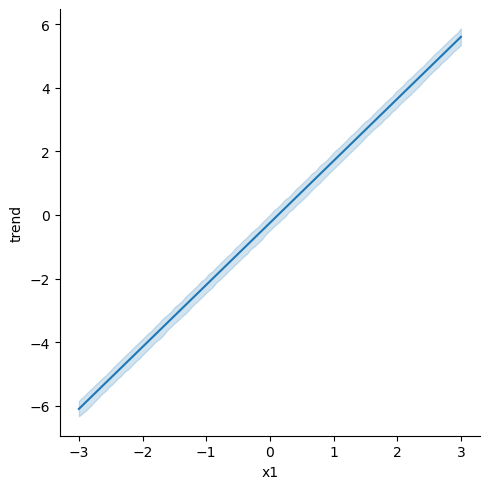

In [28]:
sns.relplot(data=study_wrt_x1_df,
            x="x1",
            y="trend",
            kind="line")

plt.show()

By default Seaborn LINE CHART want to SUMMARIZE data and CALCULATE AVERAGE behavior of the y-axis variable with respect to the x-axis variable!!!

Because the SCATTER PLOT does NOT average by default!!!

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


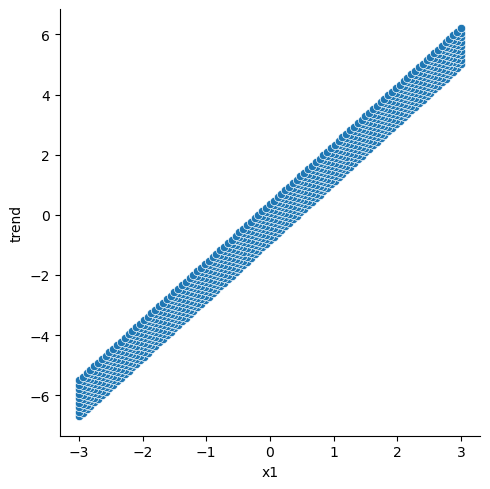

In [29]:
sns.relplot(data=study_wrt_x1_df,
            x="x1",
            y="trend",
            kind="scatter")

plt.show()

We therefore need to DISABLE or TURN OFF Seaborn's DEFAULT line chart averaging!!!

We must tell Seaborn to NOT calc a SUMMARY estimator!!!

We must tell Seaborn WHAT DEFINES each line!!! Seaborn refers to this as the UNITS of the line!!!

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


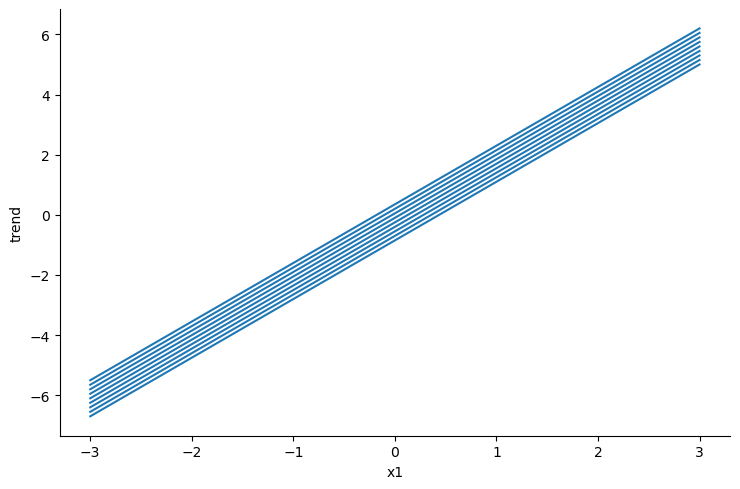

In [33]:
sns.relplot(data=study_wrt_x1_df,
            x="x1",
            y="trend",
            kind="line", estimator=None, units="x2", aspect=1.5)

plt.show()

However, we cannot tell the difference between the lines!! They all have the same color!!

We can ASSOCIATE the line color to x2 via the hue argument!!!

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


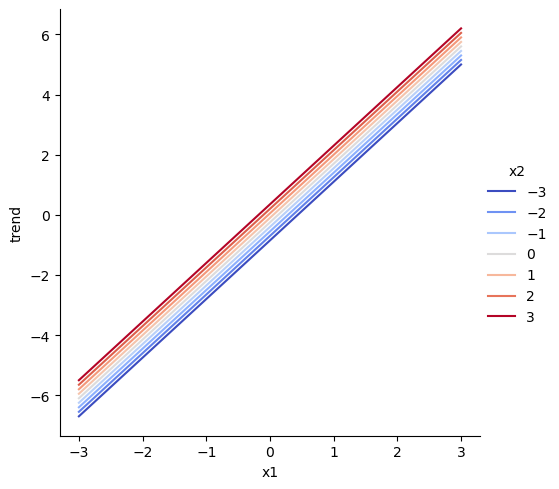

In [36]:
sns.relplot(data=study_wrt_x1_df,
            x="x1",
            y="trend",
            kind="line", estimator=None, units="x2", hue="x2", palette="coolwarm")

plt.show()

Whats going on? Why does this matter????

Additive features ADD the effect of ONE INPUT to the other!!!

If the INPUTS have roughly the same **MAGNITUDE and SCALE**, the MAGNITUDE of the SLOPE tells you which input causes the GREATER CHANGE on the AVERAGE OUTPUT!!!!

Lets see one more time by FOCUSING on the relationship with respect to x2.

In [37]:
def calc_trend_wrt_x2(x1, x2, b0, b1, b2):
    res_df = pd.DataFrame({"x2": x2})

    res_df["x1"] = x1

    res_df["trend"] = b0 + b1*res_df.x1 + b2*res_df.x2

    return res_df

Lets define 2 new arrays so we can visualize the TRENDS with respect to x2 for different values of x1.

In [38]:
x2_values_b = np.linspace(-3, 3, num=101)

In [39]:
x2_values_b.shape

(101,)

In [40]:
x1_values_b = np.linspace(-3, 3, num=9)

In [41]:
x1_values_b.shape

(9,)

Lets use the list comprehenson to iterate over the values of x1.

In [43]:
study_wrt_x2_list = [calc_trend_wrt_x2(x1, x2_values_b, b0, b1, b2) for x1 in x1_values_b]

In [44]:
study_wrt_x2_list

[       x2   x1  trend
 0   -3.00 -3.0 -6.700
 1   -2.94 -3.0 -6.688
 2   -2.88 -3.0 -6.676
 3   -2.82 -3.0 -6.664
 4   -2.76 -3.0 -6.652
 ..    ...  ...    ...
 96   2.76 -3.0 -5.548
 97   2.82 -3.0 -5.536
 98   2.88 -3.0 -5.524
 99   2.94 -3.0 -5.512
 100  3.00 -3.0 -5.500
 
 [101 rows x 3 columns],
        x2    x1   trend
 0   -3.00 -2.25 -5.2375
 1   -2.94 -2.25 -5.2255
 2   -2.88 -2.25 -5.2135
 3   -2.82 -2.25 -5.2015
 4   -2.76 -2.25 -5.1895
 ..    ...   ...     ...
 96   2.76 -2.25 -4.0855
 97   2.82 -2.25 -4.0735
 98   2.88 -2.25 -4.0615
 99   2.94 -2.25 -4.0495
 100  3.00 -2.25 -4.0375
 
 [101 rows x 3 columns],
        x2   x1  trend
 0   -3.00 -1.5 -3.775
 1   -2.94 -1.5 -3.763
 2   -2.88 -1.5 -3.751
 3   -2.82 -1.5 -3.739
 4   -2.76 -1.5 -3.727
 ..    ...  ...    ...
 96   2.76 -1.5 -2.623
 97   2.82 -1.5 -2.611
 98   2.88 -1.5 -2.599
 99   2.94 -1.5 -2.587
 100  3.00 -1.5 -2.575
 
 [101 rows x 3 columns],
        x2    x1   trend
 0   -3.00 -0.75 -2.3125
 1   -2.94 -0.75 

In [45]:
study_wrt_x2_df = pd.concat(study_wrt_x2_list, ignore_index=True)

In [46]:
study_wrt_x2_df

,x2,x1,trend
0,-3.00,-3.0,-6.700
1,-2.94,-3.0,-6.688
2,-2.88,-3.0,-6.676
3,-2.82,-3.0,-6.664
4,-2.76,-3.0,-6.652
...,...,...,...
904,2.76,3.0,6.152
905,2.82,3.0,6.164
906,2.88,3.0,6.176
907,2.94,3.0,6.188


Visualize the TREND or AVERAGE OUTPUT with respect to x2 for each unique value of x1. Use the DIVERGING color palette to help distinguish x1 values ABOVE and BELOW the x1 MIDPOINT.

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


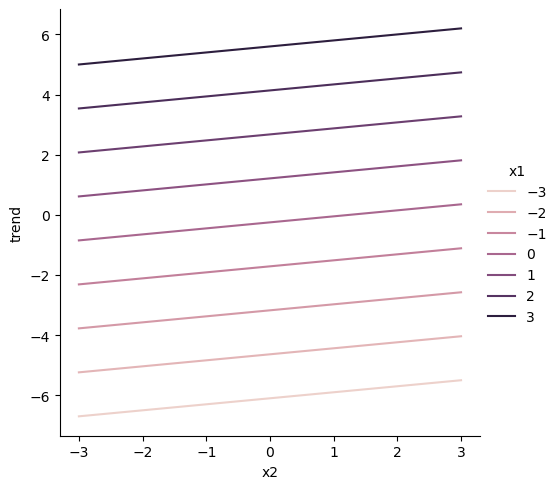

In [48]:
sns.relplot(data=study_wrt_x2_df, x="x2", y="trend", kind="line", estimator=None, units="x1", hue="x1")

plt.show()

All concepts APPLY whether I had DIFFERENT SIGNS for the SLOPES. Or if the SLOPE multiplying input 2 was greater than the slope multiplying input 1!!!!

### Interactions
Lets define another function that calculates the TREND or AVERAGE OUTPUT focusing on the RELATIONSHIP with x1. This time we will have the INTERACTION FEATURE which equals the PRODUCT of the two inputs!!

In [50]:
def calc_trend_wrt_x1_with_interaction(x1, x2, b0, b1, b2, b3):
    res_df = pd.DataFrame({"x1": x1})

    res_df["x2"] = x2

    res_df["trend"] = b0 + b1*res_df.x1 + b2*res_df.x2 + b3*res_df.x1*res_df.x2

    return res_df

We need a SLOPE defined that multiplies the INTERACTION feature!!!!

In [51]:
b3 = 1

Lets calc the TREND with respect to x1 for DIFFERENT values of x2.

In [60]:
study_interaction_wrt_x1_list = [calc_trend_wrt_x1_with_interaction(x1_values, x2, b0, b1, b2, b3) for x2 in x2_values]

In [61]:
len(study_interaction_wrt_x1_list[1])

101

In [62]:
study_interaction_wrt_x1_df = pd.concat(study_interaction_wrt_x1_list, ignore_index=True)

In [63]:
study_interaction_wrt_x1_df

,x1,x2,trend
0,-3.00,-3.0,2.300
1,-2.94,-3.0,2.237
2,-2.88,-3.0,2.174
3,-2.82,-3.0,2.111
4,-2.76,-3.0,2.048
...,...,...,...
904,2.76,3.0,14.012
905,2.82,3.0,14.309
906,2.88,3.0,14.606
907,2.94,3.0,14.903


Lets now VISUALIZE the AVERAGE OUTPUT or TREND with respect to x1 for each x2 unique value!!

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


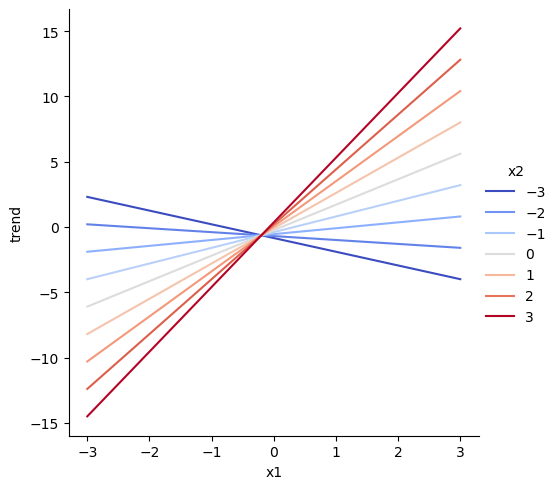

In [64]:
sns.relplot(data=study_interaction_wrt_x1_df, x="x1", y="trend", kind="line", estimator=None, units="x2", hue="x2", palette="coolwarm")

plt.show()

INTERACTION represents that the RELATIONSHIP with respect to 1 INPUT **DEPENDS** on the OTHER INPUT!!!

The same idea holds for the RELATIONSHIP with respect to x2.

In [59]:
def calc_trend_wrt_x2_with_interaction(x1, x2, b0, b1, b2, b3):
    res_df = pd.DataFrame({"x2": x2})

    res_df["x1"] = x1

    res_df["trend"] = b0 + b1*res_df.x1 + b2*res_df.x2 + b3*res_df.x1*res_df.x2

    return res_df

In [69]:
study_interaction_wrt_x2_list = [calc_trend_wrt_x2_with_interaction(x1, x2_values_b, b0, b1, b2, b3) for x1 in x1_values_b]

In [70]:
study_interaction_wrt_x2_df = pd.concat(study_interaction_wrt_x2_list, ignore_index=True)

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


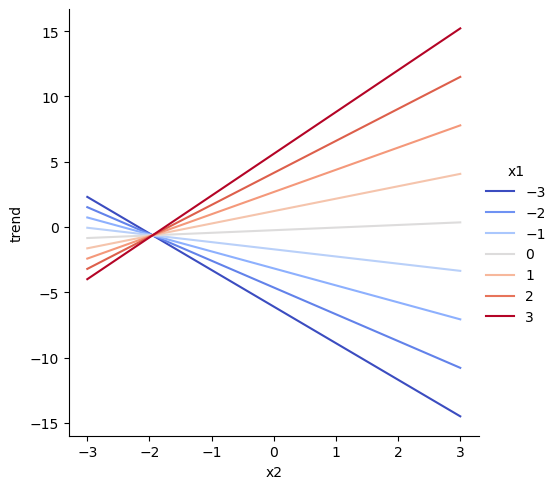

In [71]:
sns.relplot(data=study_interaction_wrt_x2_df, x="x2", y="trend", kind="line", estimator=None, units="x1", hue="x1", palette="coolwarm")

plt.show()

The RELATIONSHIP of the AVERAGE OUTPUT with respect to 1 INPUT DEPENDS on the OTHER INPUT!!!

INTERACTIONS provide a lot of FLEXIBILITY!!

INTERACTIONS allow the INPUTS to IMPACT the behavior of OTHER INPUTS!!!